## 1. Z test
## 2. t test
## 3. Chi-Square test
## 4. F test 
## 5. ANOVA

## 1. Z test

* 1.First we decide the null and alternative hypothesis

* 2.Confidence interval and alpha 

* 3.Calculate the test statistic




Q) a school claimed the student are more intellligent than avg school

* xbar = 110    n= 5  mu = 100  sigma = 15

* z_score = (xbar -mu)/ (sigma/sqrt(n))

In [1]:
!pip install scipy


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np 
import scipy.stats as stats 


In [3]:

sample_mean1 = 110
pop_mean1    = 100
pop_std1     = 15
n1           = 50
alpha1      = 0.05

In [4]:
confidence_interval1 = 1-alpha1
confidence_interval1

0.95

In [5]:
Z_score1= (sample_mean1-pop_mean1)/(pop_std1/np.sqrt(n1))
Z_score1

4.714045207910317

In [6]:
Z_critical1 = stats.norm.ppf(confidence_interval1)
Z_critical1

1.6448536269514722

In [7]:
if Z_score1 > Z_critical1:
    print('Reject the null hypothesis')
    print('ie.,The IQ of the students is more than average school')
else:
    print('Failed to reject the null hypothesis')    
    print('ie.,IQ of the students is not more than the avg school')

Reject the null hypothesis
ie.,The IQ of the students is more than average school


### P value 

if P value < alpha : we reject the null hypothesis

In [8]:
p_value1 =1 - stats.norm.cdf(abs(Z_score1))
p_value1

1.2142337364462463e-06

In [9]:
if p_value1 < alpha1 :
    print('We reject the null hypothesis')
else:
    print('falied to reject the null hypothesis')    

We reject the null hypothesis


Q):  
* sample_mean = 169.5
* pop_mean    = 168
* pop_std     = 3.9
* n           = 36
* alpha       = 0.05

* Ho: Height remains the same 
* H1: Height is diffderent

In [10]:
sample_mean2 = 169.5
pop_mean2    = 168
pop_std2     = 3.9
n2           = 36
alpha2       = 0.05

In [11]:
confidence_interval2 = 1- (alpha2/2)
Z_score2 = (sample_mean2-pop_mean2)/(pop_std2/np.sqrt(n2))
print(f'Z score:{Z_score2}')
Z_critical2 = stats.norm.ppf(confidence_interval2)
print(f'Z critical:{Z_critical2}')
if Z_score2 > Z_critical2:
    print('Reject the null hypothesis')
    print('ie.,Heights are not the same')
else:
    print('Failed to reject the null hypothesis')    
    print('ie.,heights are same')



Z score:2.3076923076923075
Z critical:1.959963984540054
Reject the null hypothesis
ie.,Heights are not the same


### p value 

In [12]:
p_value2 = 2 * (1 - stats.norm.cdf(abs(Z_score2)))
print(f'p value:{p_value2}')

if p_value2<alpha2:
    print('We reject the null hypothesis')
else:
    print('falied to reject the null hypothesis')    

p value:0.02101625622751868
We reject the null hypothesis


## 2.T test

1. One- sample t test (with respect to one independant sample)
2. Two- sample t test (with respect to two independant sample)
3. paired t-test (two sample from the same population on a diffderent time interval)

*  when limited sample 
* Pop std dev is missing
* sample mean = pop mean (true)


### 1.One- sample t test

In [13]:
my_cricket_score = [22,38,19,15,48,11,10,49,47,38,10,25,46,10,21,24,29,36,25,25]
np.mean(my_cricket_score)

27.4

null_hypothesis ::::: pop mean = sample mean (should be 27.4)

p<=0.05 ====> Reject the null hypothesis

p>0.05   ====> Fails to reject the null hypothesis

In [14]:
import scipy
result = scipy.stats.ttest_1samp(my_cricket_score,15) #

In [15]:
result[1]

0.0005672503150661017

Reject null hypothesis 
ie., mean of sample != mean of population

In [16]:
scipy.stats.ttest_1samp(my_cricket_score,27.3)[1]

0.9737671940842761

fails to reject null hypothesis 
ie., mean of sample = mean of population

### 2.Two  sample t test

In [17]:
my_cricket_score = [22,38,19,15,48,11,10,49,47,38,10,25,46,10,21,24,29,36,25,25]
virat_score     =  [33,45,23,25,46,46,46,49,49,44,44,49,25,31,25,40,30,20,42,37]

In [18]:
sample1_mean = np.mean(my_cricket_score)
sample2_mean = np.mean(virat_score)

In [19]:
print(sample1_mean)
print(sample2_mean)

27.4
37.45


null hypothesis :: sample1_mean = sample2_mean 

p<=0.05 ====> Reject the null hypothesis

p>0.05   ====> Fails to reject the null hypothesis

In [20]:
tstats,pvalue = scipy.stats.ttest_ind(my_cricket_score,virat_score)
pvalue

0.01058133208007466

Here pvalue < 0.05  , Reject the null hypothesis

Hence the two sample means are not equal

In [21]:
if pvalue<=0.05:
    print('Reject the null hypothesis')
else:
    print('Failed to reject the null hypothesis')    

Reject the null hypothesis


### 3.Two sample Paired  t test

In [22]:
# Take a sample from the same population at different time interval

import random

In [23]:
population =[]
for i in range(1,50):
    population.append(random.randint(10,80))
population    

[65,
 27,
 29,
 26,
 31,
 20,
 69,
 47,
 20,
 74,
 16,
 39,
 18,
 30,
 65,
 15,
 68,
 12,
 25,
 54,
 66,
 18,
 15,
 71,
 80,
 58,
 79,
 16,
 22,
 35,
 52,
 72,
 33,
 65,
 13,
 38,
 37,
 65,
 79,
 46,
 20,
 77,
 73,
 66,
 17,
 36,
 63,
 53,
 74]

In [24]:
cricket_scores1=np.random.choice(population,20)
cricket_scores2=np.random.choice(population,20)
print(cricket_scores1)
print(cricket_scores2)


[65 66 18 18 12 66 47 58 13 12 16 53 30 74 65 80 53 20 65 35]
[26 31 25 12 38 79 26 71 74 79 35 29 79 74 37 39 63 27 15 26]


In [25]:
cricket_scores1=[1, 2, 0 ,33, 6, 32 ,6, 14, 57, 14, 35, 66, 68, 11, 42, 46, 12, 32, 32 ,12]
cricket_scores2=[10, 29, 42, 42, 69, 42, 14, 12, 15, 29, 56, 29, 48, 69, 76, 56, 58, 56, 69, 48]

In [26]:
print(np.mean(cricket_scores1))
print(np.mean(cricket_scores2))

26.05
43.45


In [27]:
test_value , p_value =scipy.stats.ttest_rel(cricket_scores1,cricket_scores2)
p_value

0.0119956870566361

In [28]:
if p_value <= 0.05:
    print('Reject the null hypothesis')
    print('ie.,Two means are not equal')
    
else:
    print('Failed to reject the null hypothesis') 
    print('ie.,Two means are  equal')   

Reject the null hypothesis
ie.,Two means are not equal


Q: The weights of 25 obese people were taken before enrolling them into the nutrition camp. The population mean weight is found to be 45 kg before starting the camp. After finishing the camp, for the same 25 people, the sample mean was found to be 75 with a standard deviation of 25. Did the fitness camp work?

Ans:

* n=25
* pop_mean = 45
* sample_mean = 75
* sample_sd = 25



In [29]:
n=25
pop_mean = 45
sample_mean = 75
sample_sd = 25

Since the population standard deviation is not given , we have to perform the t test

1. Null hypothesis: mean of the sample   = population sample ie., camp does not work
2. alt hypothesis: ,mean of the sample  != population sample ie.,camp works

In [30]:
t_stats = (sample_mean -pop_mean)/(sample_sd/np.sqrt(n))
t_stats

6.0

alpha = 0.05 

since it is not given default value 0.05

In [31]:
alpha = 0.05
df=n-1
t_crit = stats.t.ppf(1-alpha,df)
t_crit

1.7108820799094275

In [32]:
if t_stats > t_crit:
    print('Reject the null hypothesis')
    print('ie.,camp works')
else:
    print('Failed to reject the null hypothesis')
    print('ie.,camp does not works')    

Reject the null hypothesis
ie.,camp works


### p-value

In [33]:
p_value=1-stats.t.cdf(t_stats,df)
p_value

1.703654035845048e-06

In [34]:
if p_value<=0.05:
    print('Reject the null hypothesis')
else:
    print('Failed to reject the null hypothesis')    

Reject the null hypothesis


## 3.Chi_Square test

In [35]:
import seaborn as sns

In [36]:
df= sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [37]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [38]:
df[['sex','smoker']].head(10)

,sex,smoker
0,Female,No
1,Male,No
2,Male,No
3,Male,No
4,Female,No
5,Male,No
6,Male,No
7,Male,No
8,Male,No
9,Male,No


In [39]:
import pandas as pd
table=pd.crosstab(df['sex'],df['smoker'])
table

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [40]:
observed_value = table.values
observed_value


array([[60, 97],
       [33, 54]], dtype=int64)

In [41]:
import scipy.stats as stats

### Chi Square

* Null hypothesis: two variables are independant
* alternative hypothesis: two variables are dependant

In [53]:
stats_test, p, dof,expected_values=stats.chi2_contingency(observed_value)
expected_values

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

In [54]:
expected_values

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

In [58]:
no_columns=table.iloc[0:2,0]

In [59]:
table.iloc[0:2,1]

sex
Male      97
Female    54
Name: No, dtype: int64

In [60]:
no_rows=table.iloc[0,0:2]

In [61]:
table.iloc[1,0:2]

smoker
Yes    33
No     54
Name: Female, dtype: int64

In [62]:
deg_freedom = (len(no_columns )- 1)*(len(no_rows )- 1)
deg_freedom

1

Chi_squ_tst = sum (i - n)[(O-E)^2/E]

In [63]:
for o,e in zip(observed_value,expected_values):
    print(o)
    print(e)
    

[60 97]
[59.84016393 97.15983607]
[33 54]
[33.15983607 53.84016393]


In [64]:
from scipy.stats import chi2
CHI_value=sum ([(o - e)**2/e for o,e in zip(observed_value,expected_values)])
CHI_value

array([0.00119737, 0.00073745])

In [65]:
print(CHI_value[0])
print(CHI_value[1])
chi_test_value =CHI_value[0]+CHI_value[1]
chi_test_value

0.0011973672091425045
0.0007374513274851185


0.001934818536627623

In [66]:
alpha = 0.5 # assumption: CI : 95%
ci = 1 - alpha


In [67]:
chi_crit_value=chi2._ppf(ci,deg_freedom)
chi_crit_value

0.454936423119572

 chi_test_value >= chi_crit_value ======> Reject the null hypothesis


     

In [68]:
if chi_test_value>= chi_crit_value:
    print('Reject the null hypothesis')
    print('ie.,The two categorical variables are dependant')
else:
    print('Failed to reject the null hypothesis') 
    print('ie.,The two categorical variables are independant')   

Failed to reject the null hypothesis
ie.,The two categorical variables are independant


## 4.F test

F-test is the statistical test used to compare the variances of two or more samples or populations in hypothesis testing to determine whether they are significantly different or not. It applies the F-test statistic to determine whether the variances of two samples or populations are equal or not.

The F-statistic is a test statistic that measures the ratio of the variances between groups or populations. It is calculated by dividing the Population sample variance by each sample variance.

F = Variance between groups/variance within groups.


By performing the F-test, we compare the calculated F statistic to a critical value or a specified significance level. If the results of the F-test are statistically significant, meaning that the calculated F statistic exceeds the critical value, we can reject the null hypothesis, which assumes equal variances. On the other hand, if the results are not statistically significant, we fail to reject the null hypothesis, indicating that there is not enough evidence to conclude that the variances are significantly different.

The F-test is used in statistics and machine learning for comparing variances or testing the overall significance of a statistical model, such as in the analysis of variance (ANOVA) or regression analysis.


Parameters:

* x :  quantiles
* q :  lower or upper tail probability
* dfn, dfd shape parameters
* loc :location parameter
* scale :  scale parameter (default=1)
* size :shape of random variate
* moments : composed of letters [‘mvsk’] specifying which moments to compute


### *The following conditions are critical for using the F-test to compare the variances of two populations:*

1. Normality: the populations must have a normal distribution.
2. Independent and random selection of sample items: the selection of the samples’ components should be independent and random.
3. More than unity: The variance ratio must be one or larger than one; it cannot be less than one. When dividing variance estimates, smaller estimates divide the larger estimates of variances.
4. The additive property states that the total of different variance components will equal the total variance, i.e., the total variance is the sum of the variance between samples and the variance within samples.




In [69]:
import numpy as np
import scipy.stats as stats
 
# Create the data for two groups
group1 = np.random.rand(25)
group2 = np.random.rand(20)
 
# Calculate the sample variances
variance1 = np.var(group1, ddof=1)
variance2 = np.var(group2, ddof=1)
 
# Calculate the F-statistic
f_value = variance1 / variance2
 
# Calculate the degrees of freedom
df1 = len(group1) - 1
df2 = len(group2) - 1
 
# Calculate the p-value
p_value = stats.f.cdf(f_value, df1, df2)
 
# Print the results
print('Degree of freedom 1:',df1)
print('Degree of freedom 2:',df2)
print("F-statistic:", f_value)
print("p-value:", p_value)


Degree of freedom 1: 24
Degree of freedom 2: 19
F-statistic: 1.7430265276484715
p-value: 0.8900356615880529


The F-distribution is the distribution that arises when the ratio of two independent chi-square variables is divided by their respective degrees of freedom. 

f-value = {Sample 1}/df1}{{Sample 2}/df2}

* Sample 1 & Sample 2 are the independent random variable with a chi-square distribution
* df1 & df2 are the degrees of freedom for the corresponding samples.


The degrees of freedom represent the number of observations used to calculate the chi-square variables that form the ratio. The shape of the F-distribution is determined by its degrees of freedom. It is a right-skewed distribution, meaning it has a longer tail on the right side. As the degrees of freedom increase, the F-distribution becomes more symmetric and approaches a bell shape.



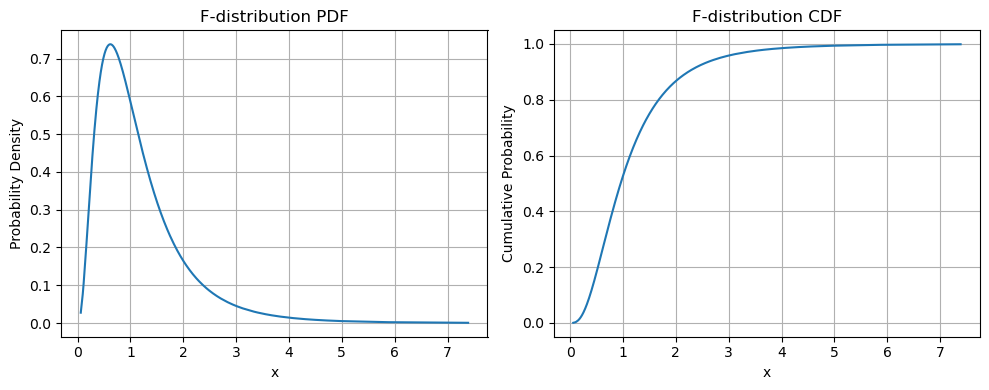

In [70]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
 
# Set the degrees of freedom
df1 = 7
df2 = 13
 
# Generate random samples from chi-square distributions
sample1 = np.random.chisquare(df1, size=1000)
sample2 = np.random.chisquare(df2, size=1000)
 
# Calculate the F-statistic
f_value = (sample1 / df1) / (sample2 / df2)
 
# Sort the f-statistic for better distribution plot
f_value = np.sort(f_value)
# Calculate the PDF of the F-distribution
pdf = stats.f.pdf(f_value, df1, df2)
 
# Calculate the CDF of the F-distribution
cdf = stats.f.cdf(f_value, df1, df2)
 
# Calculate the corresponding p-value
p_value = 1 - cdf
 
 
# Plot the PDF and CDF of the F-distribution
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(f_value, pdf)
plt.title('F-distribution PDF')
plt.xlabel('x')
plt.grid(True)
 
plt.ylabel('Probability Density')
 
plt.subplot(1, 2, 2)
plt.plot(f_value, cdf)
plt.title('F-distribution CDF')
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Example

Perform a one-way analysis of variance (ANOVA) to compare the means of multiple groups using the F-test. The objective is to determine if there are any significant differences in the means of the groups based on a set of generated data.

In [71]:
import numpy as np
import scipy.stats as stats
 
# Generate 25 samples
x = np.random.rand(25)
 
# Randomly group the data into 10 groups
num_groups = 5
group_labels = np.random.randint(0, num_groups, size=len(x))
 
# Calculate the group means
group_means = []
for i in range(num_groups):
    group_means.append(np.mean(x[group_labels == i]))
 
# Calculate the overall mean
overall_mean = np.mean(x)
 
# Calculate the sum of squares between groups
SSB = np.sum([len(x[group_labels == i]) * (group_means[i] - overall_mean)**2 for i in range(num_groups)])
 
# Calculate the degrees of freedom between groups
df_between = num_groups - 1
# Calculate the degrees of freedom with in groups
df_within = len(x)-num_groups
 
# Calculate the mean square between groups
MSB = SSB / df_between
 
# Calculate the sum of squares within groups
SSW = 0
for i in range(num_groups):
    group_samples = x[group_labels == i]
    SSW += np.sum((group_samples - group_means[i])**2)
 
MSW = SSW / df_within
 
# Calculate the F-value
F_value = MSB / MSW
 
# Degree of Freedom
print('Degree of Freedom between groups',df_between)
print('Degree of Freedom within groups',df_within)
 
# Print the F-value
print("F-value:", F_value)
 
# Set the significance level
alpha = 0.05
 
# Calculate the F-value using Percent point function (inverse of cdf)
f_critical = stats.f.ppf(1 - alpha, df_between, df_within)
 
# Print the F-critical
print("F-critical:", f_critical)
 
# Check the hypothesis
if F_value > f_critical:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")
 

Degree of Freedom between groups 4
Degree of Freedom within groups 20
F-value: 1.0397366565546942
F-critical: 2.8660814020156584
Fail to reject the null hypothesis


### Method 2:

In [72]:
import numpy as np
import scipy.stats as stats
 
np.random.seed(23)
 
# Generate 25 samples
x = np.random.rand(25)
 
# Randomly group the data into 10 groups
num_groups = 5
group_labels = np.random.randint(0, num_groups, size=len(x))
 
# Calculate the group means
group_means = []
for i in range(num_groups):
    group_means.append(np.mean(x[group_labels == i]))
 
 
# Set the significance level
alpha = 0.05
 
 
# Perform one-way ANOVA using the F-test
f_value, p_value = stats.f_oneway(*[x[group_labels == i] for i in range(num_groups)])
 
# Print the results
print("F-value:", f_value)
print("p-value:", p_value)
 
# Set the significance level
alpha = 0.05
 
# Check the hypothesis
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

F-value: 2.390357694912179
p-value: 0.08508248527342153
Fail to reject the null hypothesis


## ANOVA test

### 1.One Way ANOVA

* One-way ANOVA refers to a type of ANOVA test where there will be only one independent variable. The test compares means of groups, generally three or more groups, to analyze the variance.
* Some of the assumptions followed are the adherence to the samples selected from a normally distributed population, independence of the samples, homogeneity of variance, etc.
* The dependent variable should be continuous, and the one categorical independent variable selected should have three levels or groups.
* It is commonly used in research fields like science, biology, business economics, and psychology to analyze datasets.
* It is often compared with two way ANOVA test. The difference is that the two-way ANOVA test contains two independent variables.

### Assumptions

1. Data samples should be taken from the normally distributed population.
2. Samples should be selected randomly to ensure that observations in one sample do not depend on the observations in other samples. In essence, samples should be independent.
3. The dependent variable should be continuous.
4. The variance of data belonging to different groups should be the same.
5. In a group, there should not be any data point exhibiting an unusual pattern.
The independent variable should contain three or more levels.


---------------------------------------------0r--------------------------------------------

1. The sample should be normally distributed (check it with the Shapiro-Wilks test)
2. variances should be equal (Fisher’s F test may only be used for 2 groups; alternatives are Levene’s test, the Fligner-Killeen test of homogeneity of variances.)
3. predictor variables are categorical
4. no outlier must be found;

 which ANOVA do I run?

It all depends on how many **factors** you need to compare and on their nature. In brief:

* **One-way ANOVA** if your experimental design is based on one predictor variable (for example: drug treatment, species, location, etc) which includes at least two levels (for example: treatment A, treatment B, treatment C and control),


* **Factorial ANOVA** if your experimental design is based on two, three or more preditor variables (for example: drug treatment AND species, citizenship AND gender, species AND gender AND drug treatment, etc) and each variable has at least two levels,


* **Repeated measures ANOVA** if you have a single predictor variable and there is dependency in your data, meaning that subjects have been measured repeatedly, at different time points or in different conditions (for example: all individuals are tested at birth, during childhood and during adulthood, or all individuals have been submitted to and tested after three consecutive drug treatments).


* **Factorial repeated measures ANOVA** if you have at least two predictor variables and there is dependency in your data, meaning that subjects have been measured repeatedly, at different time points or in different conditions (for example: all individuals grouped by citizenship are tested at birth, during childhood and during adulthood, or all individuals grouped by gender have been submitted to and tested after three consecutive drug treatments).


===================================================================================================================================================================================


* A one-way ANOVA is used when assessing for differences in one continuous variable between ONE grouping variable. For example, a one-way ANOVA would be appropriate if the goal of research is to assess for differences in job satisfaction levels between ethnicities. In this example, there is only one dependent variable (job satisfaction) and ONE independent variable (ethnicity).

* A factorial ANOVA is a general term applied when examining multiple independent variables. For example, a factorial ANOVA would be appropriate if the goal of a study was to examine for differences in job satisfaction levels by ethnicity and education level. In this example, there is only one dependent variable (job satisfaction) and TWO independent variables (ethnicity and education level). A factorial ANOVA can be applied when there are two or more independent variables.

* Within-Subjects ANOVA: A within-subjects ANOVA is appropriate when examining for differences in a continuous level variable over time. A within-subjects ANOVA is also called a repeated measures ANOVA. This type of test is frequently used when using a pretest and posttest design, but is not limited to only two time periods. The repeated measures ANOVA can be used when examining for differences over two or more time periods. For example, this analysis would be appropriate if the researcher seeks to explore for differences in job satisfaction levels, measured at three points in time (pretest, posttest, 2-month follow up).

* Mixed-Model ANOVA: A mixed model ANOVA, sometimes called a within-between ANOVA, is appropriate when examining for differences in a continuous level variable by group and time. This type of ANOVA is frequently applied when using a quasi-experimental or true experimental design. This analysis would be applicable if the purpose of the research is to examine for potential differences in a continuous level variable between a treatment and control group, and over time (pretest and posttest).


* ANCOVA: An analysis of covariance (ANCOVA) is appropriate when examining for differences in a continuous dependent variable between groups, while controlling for the effect of additional variables. The “C” in ANCOVA denotes that a covariate is being inputted into the model, and this covariate examination can be applied to a between-subjects design, a within-subjects design, or a mixed-model design. ANCOVAs are frequently used in experimental studies when the researcher wants to account for the effects of an antecedent (control) variable.

* MANOVA: Finally, a multivariate analysis of variance (MANOVA) is an extension on the ANOVA, and is appropriate when examining for differences in multiple continuous level variables between groups. For example, a MANOVA would be applicable if assessing for differences between ethnicities in job satisfaction AND intrinsic motivation levels of participants. In this example, job satisfaction and intrinsic motivation are the continuous level dependent variables. The MANOVA can be conducted with multiple independent variables, and can also include covariates (i.e., MANCOVA).


===================================================================================================================================================================================

### Statement:

Researchers took 20 cars of the same to take part in a study. These cars are randomly doped with one of the four-engine oils and allowed to run freely for 100 kilometers each. At the end of the journey, the performance of each of the cars is noted.

Ans:

Stepwise Implementation
Conducting a One-Way ANOVA test in Python is a step by step process and these steps are explained below:

**Step 1:** Creating data groups.

The very first step is to create three arrays that will keep the information of cars when d

In [73]:

# Performance when each of the engine 
# oil is applied
performance1 = [89, 89, 88, 78, 79]
performance2 = [93, 92, 94, 89, 88]
performance3 = [89, 88, 89, 93, 90]
performance4 = [81, 78, 81, 92, 82]

**Step 2:** Conduct the one-way ANOVA:

Python provides us f_oneway() function from SciPy library using which we can conduct the One-Way ANOVA.

In [74]:

# Importing library
from scipy.stats import f_oneway
 
# Performance when each of the engine 
# oil is applied
performance1 = [89, 89, 88, 78, 79]
performance2 = [93, 92, 94, 89, 88]
performance3 = [89, 88, 89, 93, 90]
performance4 = [81, 78, 81, 92, 82]
 
# Conduct the one-way ANOVA
f_oneway(performance1, performance2, performance3, performance4)

F_onewayResult(statistic=4.625000000000002, pvalue=0.016336459839780215)

**Step 3:** Analyse the result:

The F statistic and p-value turn out to be equal to 4.625 and 0.016336498 respectively. Since the p-value is less than 0.05 hence we would reject the null hypothesis. This implies that we have sufficient proof to say that there exists a difference in the performance among four different engine oils.


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 2. Repeated measures ANOVA
Repeated measures ANOVA in Python is used to find whether there is a statistically significant difference exists between the means of three or more groups in which the same subjects displayed in each group. 

Hypothesis:
A repeated-measures ANOVA has the following null and alternative hypotheses involved:

The null hypothesis (H0): µ1 = µ2 = µ3 (In other words, population means are equal)
The alternative hypothesis: (Ha): According to it, at least one population mean differs from the rest

Q) Let us consider an example, researchers are curious to know if four different engine oils lead to different mileage of cars. In order to test this, they measured the mileage of 5 cars using four different engine oils. Since each car’s mileage is measured by applying each of the four-engine oils one by one so we can use a repeated-measures ANOVA to check if the mean reaction time differs between drugs. 

Performing the repeated measures ANOVA in Python is a step-by-step process. These steps are explained below.

**Step 1:** Create the data 

In [75]:
# Import the library 
import numpy as np 
import pandas as pd 

# Create the data 
dataframe = pd.DataFrame({'Cars': np.repeat([1, 2, 3, 4, 5], 4), 
						'Engine Oil': np.tile([1, 2, 3, 4], 5), 
						'Mileage': [36, 38, 30, 29, 
									34, 38, 30, 29, 
									34, 28, 38, 32, 
									38, 34, 20, 44, 
									26, 28, 34, 50]}) 

# Print the dataframe 
print(dataframe) 


    Cars  Engine Oil  Mileage
0      1           1       36
1      1           2       38
2      1           3       30
3      1           4       29
4      2           1       34
5      2           2       38
6      2           3       30
7      2           4       29
8      3           1       34
9      3           2       28
10     3           3       38
11     3           4       32
12     4           1       38
13     4           2       34
14     4           3       20
15     4           4       44
16     5           1       26
17     5           2       28
18     5           3       34
19     5           4       50


**Step 2:** Conduct the repeated measures ANOVA.

Python provides us AnovaRM() function from the statsmodels library to measure repeated measures ANOVA. 

In [76]:
# Import library 
import numpy as np 
import pandas as pd 
from statsmodels.stats.anova import AnovaRM 

# Create the data 
dataframe = pd.DataFrame({'Cars': np.repeat([1, 2, 3, 4, 5], 4), 
						'Oil': np.tile([1, 2, 3, 4], 5), 
						'Mileage': [36, 38, 30, 29, 
									34, 38, 30, 29, 
									34, 28, 38, 32, 
									38, 34, 20, 44, 
									26, 28, 34, 50]}) 

# Conduct the repeated measures ANOVA 
print(AnovaRM(data=dataframe, depvar='Mileage', 
			subject='Cars', within=['Oil']).fit()) 


              Anova
    F Value Num DF  Den DF Pr > F
---------------------------------
Oil  0.5679 3.0000 12.0000 0.6466



**Step 3:** Analyse the results.

In this example, the F test-statistic comes out to be equal to 0.5679 and the corresponding p-value is 0.6466. Since this p-value is not less than 0.05, we cannot reject the null hypothesis and conclude that there is a not statistically significant difference in mean response times between the four-engine oils.

**Step 4:** Report the outcome.

Let us report the result now: A one-way repeated measures ANOVA is conducted on 5 individuals to interpret the effect of four different engine oils on the mileage. Results showed that the type of drug used led to statistically significant differences in response time (F(3, 12) = 0.5679, p < 0.6466).

### 3. Factorial ANOVA

A factorial ANOVA is any ANOVA (“analysis of variance”) that uses two or more independent factors and a single response variable. 

This type of ANOVA should be used whenever you’d like to understand how two or more factors affect a response variable and whether or not there is an interaction effect between the factors on the response variable.

#### **Example 1: Plant Growth**
--------------------------------

A botanist wants to understand how sunlight exposure and watering frequency affect plant growth. She plants 100 seeds and lets them grow for three months under different conditions for sunlight exposure and watering frequency. After three months, she records the height of each plant.

In this case, she has the following variables:

Response variable: plant growth
Factors: sunlight exposure, watering frequency
And she would like to answer the following questions:

Does sunlight exposure affect plant growth?
Does watering frequency affect plant growth?
Is there an interaction effect between sunlight exposure and watering frequency?
She could use a factorial ANOVA for this analysis because she wants to understand how two factors affect a single response variable.

#### **Example 2: Exam Scores**
-----------------------------------

A professor wants to understand how class time and teaching method affect exam scores. He uses two different teaching methods and two different teaching times (early morning and early afternoon) and records the average exam scores of each student at the end of the semester.

In this case, he has the following variables:

Response variable: exam score
Factors: teaching method, teaching time
And he would like to answer the following questions:

Does teaching method affect exam scores?
Does teaching time affect exam scores?
Is there an interaction effect between teaching method and teach time?
He could use a factorial ANOVA for this analysis because he wants to understand how two factors affect a single response variable.

#### **Example 3: Annual Income**
----------------------------------

An economist collects data to understand how education level (high school diploma, college degree, graduate degree), marital status (single, divorced, married), and region (North, East, South, West) affect annual income.

In this case, he has the following variables:

Response variable: annual income
Factors: education level, marital status, region
And he would like to answer the following questions:

Does education level affect income?
Does marital status affect income?
Does region affect income?
Is there an interaction effect between these three independent factors?
He could use a factorial ANOVA for this analysis because he wants to understand how three factors affect a single response variable.